In [10]:
%pip install opencv-python
%pip install pandas
%pip install scikit-learn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd

# Define the path to the CSV file
csv_path = "archive/dataset.csv"

# Read the CSV file
coins_df = pd.read_csv(csv_path)
print(coins_df.columns)
print(coins_df.head())

Index(['folder', 'file_name'], dtype='object')
                     folder                           file_name
0  Lincoln Cents, 1909-Date  Lincoln Cent 37633_219 Obverse.jpg
1  Lincoln Cents, 1909-Date   Lincoln Cent 320686_6 Reverse.jpg
2  Lincoln Cents, 1909-Date  Lincoln Cent 107258_64 Reverse.jpg
3  Lincoln Cents, 1909-Date  Lincoln Cent 37633_222 Reverse.jpg
4  Lincoln Cents, 1909-Date   Lincoln Cent 41463_18 Obverse.jpg


In [11]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to load images and labels based on the CSV
def load_images_and_labels_from_csv(df, image_base_path):
    images = []
    labels = []
    classes = sorted(df['folder'].unique())  # Use 'folder' as the class label
    class_indices = {cls: idx for idx, cls in enumerate(classes)}
    
    for idx, row in df.iterrows():
        img_path = os.path.join(image_base_path, row['folder'], row['file_name'])  # Construct the full image path
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize images to 128x128
            images.append(img)
            labels.append(class_indices[row['folder']])  # Use 'folder' as the class label
    
    images = np.array(images)
    labels = to_categorical(np.array(labels), num_classes=len(classes))
    return images, labels, classes

# Define paths
csv_path = "archive/dataset.csv"
image_base_path = "archive/coins"

# Load and preprocess the data
coins_df = pd.read_csv(csv_path)
images, labels, classes = load_images_and_labels_from_csv(coins_df, image_base_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Save the model for future use
model.save('coin_detector_model.h5')


c:\Users\Myranda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.6048 - loss: 0.8799 - val_accuracy: 0.9667 - val_loss: 0.0924
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.9423 - loss: 0.1717 - val_accuracy: 0.9853 - val_loss: 0.0399
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.9819 - loss: 0.0590 - val_accuracy: 0.9893 - val_loss: 0.0397
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.9873 - loss: 0.0339 - val_accuracy: 0.9773 - val_loss: 0.0784
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.9884 - loss: 0.0292 - val_accuracy: 0.9893 - val_loss: 0.0379
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.9942 - loss: 0.0168 - val_accuracy: 0.9840 - val_loss: 0.0744
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9907 - val_loss: 0.0212
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - accuracy: 0.9992 - loss: 0.0063 - val_accu

Test accuracy: 0.99


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


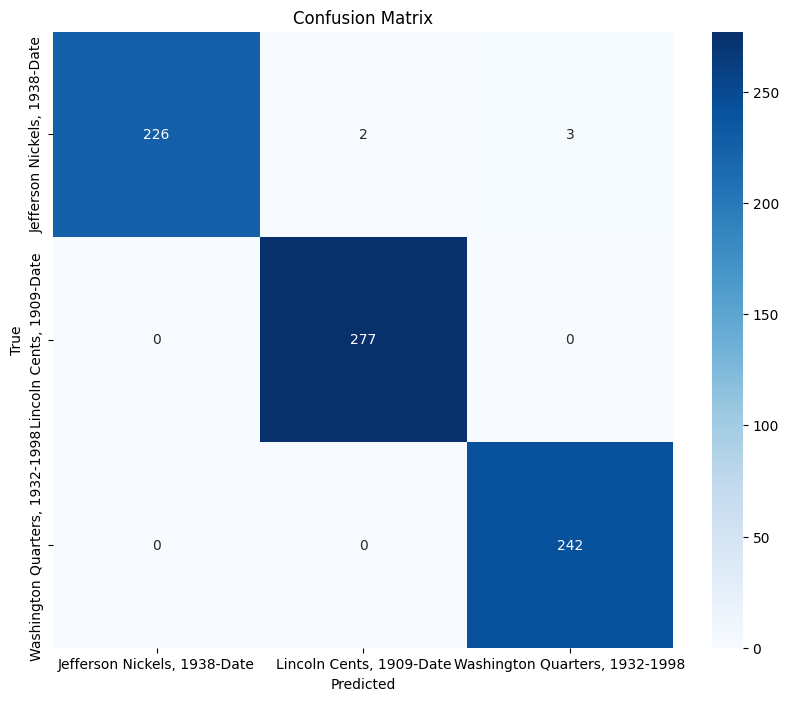

                                precision    recall  f1-score   support

  Jefferson Nickels, 1938-Date       1.00      0.98      0.99       231
      Lincoln Cents, 1909-Date       0.99      1.00      1.00       277
Washington Quarters, 1932-1998       0.99      1.00      0.99       242

                      accuracy                           0.99       750
                     macro avg       0.99      0.99      0.99       750
                  weighted avg       0.99      0.99      0.99       750



In [13]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=classes))

In [20]:
import tensorflow as tf
import numpy as np
import cv2

# Load the trained model
model = tf.keras.models.load_model("coin_detector_model.h5")

# Load and preprocess the image
image_path = "test7.jpg"
img = cv2.imread(image_path)
img = cv2.resize(img, (128, 128))
img = img / 255.0  # Normalize the image
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make a prediction
prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
class_labels = sorted(coins_df['folder'].unique())

# Display the result
print(f'Predicted class: {class_labels[predicted_class[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted class: Jefferson Nickels, 1938-Date
